## Best ML Model

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import lightgbm as lgb

In [2]:
data = pd.read_csv('regression/final_elem_SP.csv')
data.head()

,formula,S_p,Bandgap,mpe,PF,X_b,std_BL,mean_BL,vdw_r_b,Mean_NpValence,...,Mean_NfUnfilled,AM_b,MP_b,Mean_NsUnfilled,Mean_NsValence,MeanColumn,MEN_V_b,Mean_NdUnfilled,TC_b,D_b
0,ReO3,0.336845,0.000000,0.311128,0.276212,3.44,0.000001,1.913169,1.52,3.00,...,0.0,15.99940,54.80,0.00,2.00,13.75,14.0,1.25,0.02658,0.001308
1,Yb3Mg,14.406792,0.000000,0.740480,0.573238,1.31,0.000000,3.690337,1.73,0.00,...,0.0,24.30500,923.00,0.00,2.00,2.75,14.0,0.00,160.00000,1.740000
2,B9H11,638.974583,2.911795,0.101052,0.125865,2.20,0.059786,1.236931,1.10,0.45,...,0.0,1.00794,14.01,0.55,1.45,6.40,14.1,0.00,0.18050,0.000082
3,Li3Ga7,9.061345,0.000000,0.542895,0.555130,1.81,0.073217,2.838474,1.87,0.70,...,0.0,69.72300,302.91,0.30,1.70,9.40,11.8,0.00,29.00000,5.910000
4,Sc3Cd,22.887388,0.000000,0.713049,0.719525,1.69,0.004315,3.206197,2.18,0.00,...,0.0,112.41100,594.22,0.00,2.00,5.25,13.1,6.75,97.00000,8.690000


In [3]:
data = data.drop(['TC_a','D_a','MEN_V_a','Mean_NfValence','EA_b','r_a',
'Mean_NdValence','r_b','Mean_GSbandgap','Number','Mean_GSmagmom','Mean_NfUnfilled',
'AM_b','MP_b','Mean_NsUnfilled','Mean_NsValence','MeanColumn','MEN_V_b',
'Mean_NdUnfilled','TC_b','D_b'], axis=1)

In [4]:
X = data.iloc[:,2:-1]
Y = data.iloc[:,1]

In [5]:
def read_param():  ## function for reading saved hyperparameters
    f0 = open('regression/best-paramters_lgb_optuna_TPE_plot1.txt','r')
    b = []
    for line in f0.readlines():
        a = line.split()
        a_ = [a[i] for i in range(len(a))]
        b.append(a_)
    f0.close()
    p1 = float(b[1][1]); p2 = float(b[2][1]); p3 = int(b[3][1]); p4 = float(b[4][1])
    p5 = float(b[5][1]); p6 = int(b[6][1]); p7 = int(b[7][1]); p8 = float(b[8][1])
#     p9 = int(b[9][1])
    return p1, p2, p3, p4, p5, p6, p7, p8

In [6]:
R2test = []
R2train = []
rmsetest = []
rmsetrain = []
maetest = []
maetrain = []


p1, p2, p3, p4, p5, p6, p7, p8 = read_param()
params = {'objective': 'regression', 'boosting_type': 'gbdt', 'lambda_l1': p1,
          'lambda_l2': p2, 'num_leaves': p3, 'feature_fraction': p4, 
          'bagging_fraction': p5, 'bagging_freq': p6, 'min_child_samples': p7,
          'learning_rate': p8} 

## Finding the best ML model

In [7]:
start = 0
end = 2000
test_size = 0.3
for random in range(start, end+1, 1):
    print(random)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = test_size, random_state = random)
    d_train = lgb.Dataset(X_train, label = Y_train)                  
    reg = lgb.train(params, d_train)
    
    Y_pred_test = reg.predict(X_test) 
    Y_pred_train = reg.predict(X_train) 
    
    R2_test = r2_score(Y_test, Y_pred_test)
    R2_train = r2_score(Y_train, Y_pred_train)
    print("R2 value train:  ", R2_train)
    print("R2 value test:  ", R2_test)
       
    rmse_test=np.sqrt(mean_squared_error(Y_test, Y_pred_test))
    rmse_train=np.sqrt(mean_squared_error(Y_train, Y_pred_train))
    print("RMSE train:  ", rmse_train)
    print("RMSE test:  ",  rmse_test)
    
    mae_test=mean_absolute_error(Y_test, Y_pred_test)
    mae_train=mean_absolute_error(Y_train, Y_pred_train)
    print("mae train:  ", mae_train)
    print("mae test:  ",  mae_test)


    R2test.append(R2_test)
    R2train.append(R2_train)
    rmsetest.append(rmse_test)
    rmsetrain.append(rmse_train)
    maetest.append(mae_test)
    maetrain.append(mae_train)

0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4679
[LightGBM] [Info] Number of data points in the train set: 4749, number of used features: 26
[LightGBM] [Info] Start training from score 210.024342
R2 value train:   0.9886958372529288
R2 value test:   0.9772876394225745
RMSE train:   32.669007388333824
RMSE test:   46.405049723888844
mae train:   17.291445251815038
mae test:   24.275894001841927
1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4649
[LightGBM] [Info] Number of data points in the train set: 4749, number of used features: 26
[LightGBM] [Info] Start training from score 216.191219
R2 value train:   0.989853679749609
R2 value test:   0.9740806852090372
RMSE train:   31.10894660247763

In [8]:
minrmsetest = min(rmsetest)  
ind = rmsetest.index(minrmsetest)  
avg_rmse_train = np.mean(rmsetrain)
avg_rmse_test = np.mean(rmsetest)
avg_r2_train = np.mean(R2train)
avg_r2_test = np.mean(R2test)
avg_mae_train = np.mean(maetrain)
avg_mae_test = np.mean(maetest)
print("Random state is = ", start+ind)
print("Best R2 train/test =  ", R2train[ind]," / ", R2test[ind])
print("Best RMSE train/test = ", rmsetrain[ind]," / ",rmsetest[ind])
print("Best MAE train/test = ", maetrain[ind]," / ",maetest[ind])
print("Avg R2 train/test =  ", avg_r2_train," / ", avg_r2_test)
print("Avg RMSE train/test = ", avg_rmse_train," / ",avg_rmse_test)
print("Avg MAE train/test = ", avg_mae_train," / ",avg_mae_test)

Random state is =  1620
Best R2 train/test =   0.9881379507804899  /  0.9821778703596796
Best RMSE train/test =  33.51584467419854  /  40.959364911959824
Best MAE train/test =  17.789120768616737  /  22.617707938438333
Avg R2 train/test =   0.9890423719637869  /  0.9768037167531262
Avg RMSE train/test =  32.17308413327325  /  46.79615793878119
Avg MAE train/test =  17.17955604920313  /  24.39157012232847


In [9]:
###### =============================================================================
######         Writing to a file
###### =============================================================================
f = open('regression/best_lbgm_model_using_optuna_optimized_hyperparmeters1.txt', 'a')
f.write("No of data points = %d\n" %(len(data)))
f.write("features used = %s\n" %(X.columns))
f.write("No of features = %d\n" %(len(X.columns)))
f.write("Best random state = %d\n" %(ind))
f.write("Model used = %s\n" %(reg.params))
f.write("test size in ratio = %f\n" %(test_size))
f.write("Random state is = %d\n" %(start+ind))
f.write("Best R2 train/test =  %f / %f\n" %(R2train[ind], R2test[ind]))
f.write("Best RMSE train/test = %f / %f\n" %(rmsetrain[ind], rmsetest[ind]))
f.write("Best MAE train/test = %f / %f\n" %(maetrain[ind], maetest[ind]))
f.write("Avg R2 train/test =  %f / %f\n" %(avg_r2_train, avg_r2_test))
f.write("Avg RMSE train/test = %f / %f\n" %(avg_rmse_train, avg_rmse_test))
f.write("Avg MAE train/test = %f / %f\n" %(avg_mae_train, avg_mae_test))
f.write("\n")
f.close()

In [10]:
## Redo the above step for the best model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = ind)
d_train = lgb.Dataset(X_train, label = Y_train)
reg = lgb.train(params, d_train)
Y_pred_test = reg.predict(X_test) 
Y_pred_train = reg.predict(X_train) 
reg.save_model('regression/best_model_lgbm1.txt') ## also save the best model, can be later read directly from this file  

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4676
[LightGBM] [Info] Number of data points in the train set: 4749, number of used features: 26
[LightGBM] [Info] Start training from score 212.814099


## Parity plot

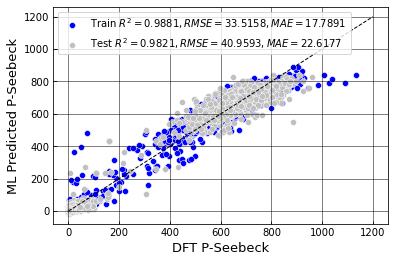

In [11]:
from matplotlib import rcParams
xl = np.arange(0,1200,1)
yl = np.arange(0,1200,1)
#plt.rc("savefig", bbox="tight", dpi=2000, figsize=(10,10))
plt.plot(yl, xl, linestyle='dashed', linewidth=1.0, color='black')  
plt.grid(color='black', linestyle='-', linewidth=0.5)
#plt1= plt.figure(figsize=(10,10))
plt.tick_params(axis='both', direction='in')
plt.xlabel('DFT P-Seebeck',fontsize=13)
plt.ylabel('ML Predicted P-Seebeck',fontsize=13)
rcParams['figure.figsize'] = 10,10
sns.scatterplot(x = Y_train, y = Y_pred_train, color = "blue",legend = True, label='Train $R^2 =  0.9881, RMSE = 33.5158, MAE = 17.7891$')
sns.scatterplot(x = Y_test, y = Y_pred_test, color = "silver", legend = True,label='Test $R^2 =  0.9821, RMSE = 40.9593, MAE = 22.6177$')

plt.savefig('images/best_lbgm_optuna_model2.png',dpi=2000)
plt.show()

## Here we read the save lgbm model to predict an entire new dataset

In [12]:
import lightgbm as lgb
bst = lgb.Booster(model_file="saved_models/best_model_lgbm.txt")


# Get the model's features in the correct order
cols = bst.feature_name()     # -> ['feat1', 'feat2', 'feat3', ...]

# Use col to reindex the prediction DataFrame
df = X.reindex(columns=cols) # -> df now has the same col ordering as the model

# Get predictions that are consistent! 
predictions = bst.predict(df)

LightGBMError: Could not open saved_models/best_model_lgbm.txt

In [ ]:
predictions

In [ ]:
df1= pd.DataFrame(predictions)
df1

In [ ]:
X